In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as integrate
from scipy.optimize import brentq
import math as math
import numpy.linalg as linalg
from scipy.interpolate import interp1d
import time
import psutil
import os

## 1. Cross section in the center of mass frame.
<br> 
The process
$ e^- + e^+ \rightarrow \mu^- + \mu^+ $
is fundamental in the understanding of QED theory, and very important in high energy physics for the understanding of $e^-e^+$ colliders and more complicated processes.
<br>
We are going to compute the cross section of this process in the center of mass frame. Let's discuss the mass order of the fermions: as we know this process has an energy about the order of at least two times the muon mass. Also recall that $m_\mu/m_e\sim 200$ so $m_e^2<<s$, consequently, we can assume an electron massless limit, while the muon mass cannot be negligible.

Also recall that $s$ is a Mandelstam variable and corresponds to $s=(p_1+p_2)^2=(p_3+p_4)^2$.

Firstly, we need to compute the Feynmann diagram and the correspondent amplitude $\mathcal{M}$, following the Feynmann rules.

<img src="FDME.png" width="400">

$$i\mathcal{M}=\frac{ie^2}{s} [\bar{v}(p_2) \gamma^\mu u(p_1)] [\bar{u}(p_3) \gamma_\mu v(p_4)] $$

As we can see, this process can be only possible through an s-channel. The next step is to compute the summed squared amplitude over the initial polarization states:

$$|\mathcal{\bar{M}}|^2=\frac{8e^4}{s^2} [(p_1\cdot p_3)(p_2\cdot p_4)+(p_1\cdot p_4)(p_2\cdot p_3)+m_\mu^2(p_1\cdot p_2)]$$

Let's now apply the center of mass frame, and applying the energy/momentum conservation, we can express the 4-momentum of all the particles in the following way:

<img src="CoM.png" width="700">

Using that in the electron massless limit $s=(p_1+p_2)^2=2(p_1\cdot p_2)=4E^2$, we can establish the relation $E=\frac{\sqrt{s}}{2}$, and $|\vec{k}|=\sqrt{E^2-m_\mu^2}=\frac{1}{2}\sqrt{s-4m_\mu^2}$.
We can write the summed squared amplitude over the initial polarization states as a funtion of $s$ and $\theta$ variables:

$$|\mathcal{\bar{M}}|^2=16\pi^2\alpha^2\left[\left(1+\frac{4m_\mu^2}{s}\right)+\left(1-\frac{4m_\mu^2}{s}\right)\cos^2{\theta}\right]$$

Using the following expression for the differential cross section: $\frac{d\sigma}{d\cos{\theta}}=\frac{1}{32\pi s}\frac{|\vec{k}|}{E}|\mathcal{\bar{M}}|^2$. We get the following expression:

$$\left(\frac{d\sigma}{d\cos{\theta}}\right)_{CM}=\frac{\pi \alpha^2}{2s} \sqrt{1-\frac{4m_\mu^2}{s}} \left[\left(1+\frac{4m_\mu^2}{s}\right)+\left(1-\frac{4m_\mu^2}{s}\right)\cos^2{\theta}\right]$$

Now we integrate the differential cross section in order to get the total cross section:

$$\sigma=\int_{-1}^{1} \frac{d\sigma}{d\cos{\theta}} d\cos{\theta}= \frac{4\pi \alpha^2}{3s} \sqrt{1-\frac{4m_\mu^2}{s}} \left(1+\frac{2m_\mu^2}{s}\right) $$

The probability distribution function of the theta angle is given by:

$$ P(\theta)=\frac{d\sigma}{d\theta}=\frac{d\sigma}{d\cos{\theta}}\frac{d\cos{\theta}}{d\theta}=\frac{d\sigma}{d\cos{\theta}}\sin{\theta}$$

We can also define a normalized (its integral in $\theta$ range, $[0,\pi]$, should be 1) function that goes by:

$$P(\theta)_{norm}=\frac{P(\theta)}{\sigma}$$

In [8]:
np.random.seed(12345)
m_mu=0.10566 #GeV
fsc=1/137
conv = 0.389379e6 #GeV^-1 to nB
E_sim=2*m_mu+np.random.rand()*1e-2 #Simulation of the experimental on the low energy region

In [9]:
def cross_section(s): #s in GeV^2
    return (4*np.pi*fsc**2)/(3*s)*np.sqrt(1-4*m_mu**2/s)*(1+2*m_mu**2/s)*conv
def dif_cross_section(s,theta):
    return (np.pi*fsc**2)/(2*s)*np.sqrt(1-4*m_mu**2/s)*((1+4*m_mu**2/s)+(1-4*m_mu**2/s)*(np.cos(theta))**2)*conv
def pdf(s,theta):
    return dif_cross_section(s,theta)*np.sin(theta)
def pdf_norm(s,theta):
    return (pdf(s,theta*np.pi/180)*np.pi/180)/cross_section(s)


print('Value of the cross section: '+ str(round(cross_section(E_sim**2),3)))
print('Value integral pdf: '+  str(round(integrate.quad(lambda theta: pdf(E_sim**2,theta),0,np.pi)[0],3)))
print('Value integral pdf normalized: ', str(round(integrate.quad(lambda theta: pdf_norm(E_sim**2,theta),0,180)[0],3)))

Value of the cross section: 748.084
Value integral pdf: 748.084
Value integral pdf normalized:  1.0


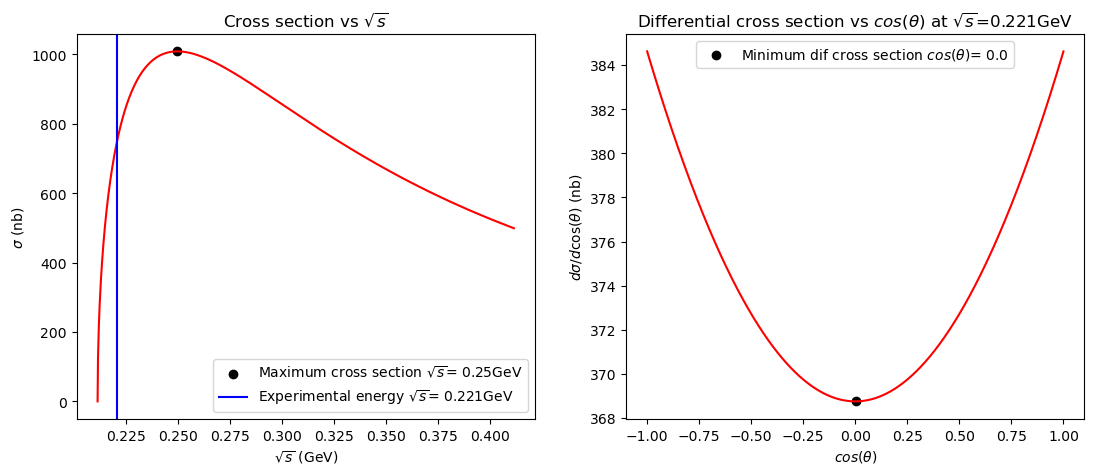

In [10]:
theta_values=np.linspace(0,np.pi,1000)
theta_values_deg=np.linspace(0,180,1000)
E_values=np.linspace(2*m_mu,2*m_mu+0.2,1000)
idx=np.argmax(cross_section(E_values**2))
E_maxcs=E_values[idx]
idx2=np.argmin(dif_cross_section(E_sim**2,theta_values))
theta_mincs=theta_values[idx2]


fig, ax = plt.subplots(1,2, figsize=(13,5))

ax[0].plot(E_values,cross_section(E_values**2), c='r')
ax[0].set_xlabel(r'$\sqrt{s}$ (GeV)')
ax[0].set_ylabel(r'$\sigma$ (nb)')
ax[0].set_title(r'Cross section vs $\sqrt{s}$')
ax[0].scatter(E_maxcs,cross_section(E_maxcs**2), label=r'Maximum cross section $\sqrt{s}$= '+ str(round(E_maxcs,3)) +"GeV", c='k')
ax[0].axvline(E_sim, label=r'Experimental energy $\sqrt{s}$= '+ str(round(E_sim,3)) +"GeV", c='b')
ax[0].legend()

ax[1].plot(np.cos(theta_values),dif_cross_section(E_sim**2,theta_values), c='r')
ax[1].set_xlabel(r'$cos(\theta)$')
ax[1].set_ylabel(r'$d\sigma/d\cos(\theta)$ (nb)')
ax[1].scatter(np.cos(theta_mincs),dif_cross_section(E_sim**2,theta_mincs), label=r'Minimum dif cross section $cos(\theta$)= '+ str(round(np.cos(theta_mincs),1)), c='k')
ax[1].set_title(r'Differential cross section vs $cos(\theta)$ at $\sqrt{s}$='+ str(round(E_sim,3)) +"GeV")
ax[1].legend()

plt.show()

##  Cross section vs $\sqrt{s}$: 
we can see that the cross section on $\sqrt{s}=2m_\mu$ is 0, then, the function increases rapidly until it reaches the maximum at $\sqrt{s}=0,250$ GeV. Next. the function decreases slowly to zero, that is because we are entering the high energy limit where our model does not work anymore because we cannot neglect the higher orders of the Feynmann diagrams, and some approximations cannot be used in this regime anymore.

## Differential cross section vs $cos(\theta)$: 
with a fixed energy of our simulated experimental energy: $\sqrt{s}$ =0,221 GeV. We can see that we get a positive quadratic function centered in 0 (it makes sense looking at the differential cross section expression) which is why we get the minimum on 0. If we were to plot the differential cross section vs $\theta$ we would get a cosinusoidal function.

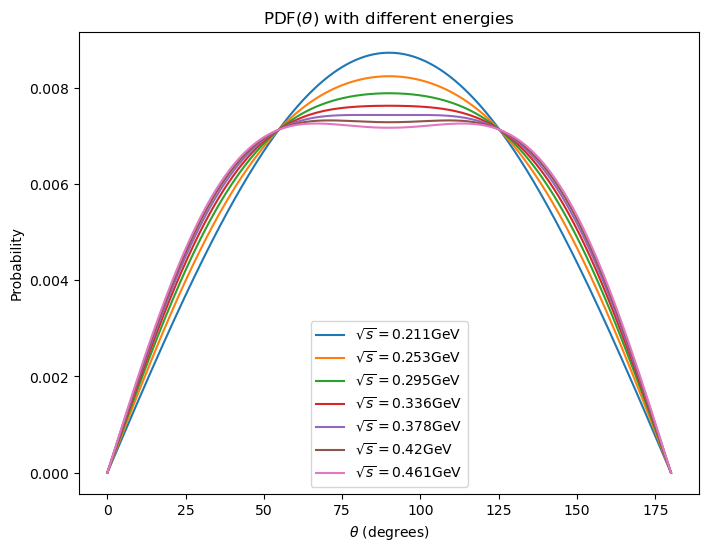

In [11]:
plt.figure(figsize=(8,6))
N=7
E_v=np.linspace(2*m_mu+0.0001,2*m_mu+0.25,N)
for i in range(N):
    plt.plot(theta_values_deg,pdf_norm(E_v[i]**2,theta_values_deg), label= r'$\sqrt{s}=$'+str(round(E_v[i],3))+'GeV')
plt.xlabel(r'$\theta$ (degrees)')
plt.title(r'PDF($\theta$) with different energies')
plt.ylabel('Probability')
plt.legend()
plt.show()

We can see that as we vary the energy, we obtain different pdf's, when we increase the energy, the maximum region starts decreasing its height. For energies larger than 0,3-0,4 GeV the maximum region flattens out and then becomes a minimum surrounded by two maximums, this doesnt make a lot of sense as a pdf, this is due to reaching the high energy regime and, as we explained before, our model stops working.

## MONTE CARLO  

Write a Monte Carlo simulation that generates scattering events following the distributions that you found analytically.

In [13]:
'''The approach is to use different methods and see which one is the best for optimize the simulation.
We try with those methods:

1) Hit or Miss: This method involves generating random points within a defined rectangular area that 
encompasses the distribution curve of interest. Points beneath the curve (i.e., where the y-value of the 
point is less than the y-value of the distribution at that x) are kept ("hits"), while others are 
discarded ("misses"). The ratio of hits to total points gives an approximation of the area under the 
curve, which corresponds to the integral of the distribution. This technique is straightforward but can 
be inefficient, especially for narrow distributions.

2) Metropolis-Hastings: This method is a type of Markov Chain Monte Carlo (MCMC) technique
(stochastic process without memory, whose future state depends only on the present state and not on how 
it was reached). It generates a sequence of sample values in such a way that, as more samples are 
produced, the distribution of values more closely approximates the desired distribution. It does this by 
starting from an arbitrary position and generating a new sample (theta_star) based on a proposal 
distribution. This new sample is then accepted with a probability that depends on the ratio of the 
distribution's value at the new sample to that at the current sample. This method is more efficient than 
Hit or Miss for complex or multi-dimensional distributions.

3) Inverse Sampling: This method relies on the Cumulative Distribution Function (CDF) of the target 
distribution. By sampling from a uniform distribution and then applying the inverse CDF, samples are 
generated according to the desired distribution. This method requires the analytical form of the inverse 
CDF, which can be a limitation for distributions where the inverse CDF is difficult to calculate.'''

'The approach is to use different methods and see which one is the best for optimize the simulation.\nWe try with those methods:\n\n1) Hit or Miss: This method involves generating random points within a defined rectangular area that \nencompasses the distribution curve of interest. Points beneath the curve (i.e., where the y-value of the \npoint is less than the y-value of the distribution at that x) are kept ("hits"), while others are \ndiscarded ("misses"). The ratio of hits to total points gives an approximation of the area under the \ncurve, which corresponds to the integral of the distribution. This technique is straightforward but can \nbe inefficient, especially for narrow distributions.\n\n2) Metropolis-Hastings: This method is a type of Markov Chain Monte Carlo (MCMC) technique\n(stochastic process without memory, whose future state depends only on the present state and not on how \nit was reached). It generates a sequence of sample values in such a way that, as more samples a

In [14]:
# Number of iterations
iterations = 10**5
# Load parameters for comparison
process = psutil.Process(os.getpid())

### > HIT or MISS

In [20]:
#Func
def hit_or_miss(distribution, num_samples, x_range, y_range):
    x_samples = np.random.uniform(*x_range, num_samples)
    y_samples = np.random.uniform(*y_range, num_samples)
    hits = y_samples <= distribution(E_sim**2,x_samples)
    return x_samples[hits]

angle_range = (np.min(theta_values_deg), np.max(theta_values_deg))  # In degrees
pdf_range = (np.min(pdf_norm(E_sim**2,theta_values_deg)), np.max(pdf_norm(E_sim**2,theta_values_deg)))

In [21]:
mem_before_hm = process.memory_info().rss / 1024 / 1024
start_time_hm = time.time()
theta_samples_hm = hit_or_miss(pdf_norm, iterations, angle_range, pdf_range)
end_time_hm = time.time()
mem_after_hm = process.memory_info().rss / 1024 / 1024
    
#filename_hm = f"data/theta_samples_HM.csv"
#np.savetxt(filename_hm, theta_samples_hm)

time_hm = round((end_time_hm - start_time_hm),3)
mem_usage_hm = round((mem_after_hm - mem_before_hm),3)
accepted_hm = round((len(theta_samples_hm)/iterations),3)

print(f"Execution time: {time_hm} seconds")
print(f"Memory usage: {mem_usage_hm} MB")
print(f"Accepted rate: {accepted_hm}")

Execution time: 0.02 seconds
Memory usage: 1.535 MB
Accepted rate: 0.646


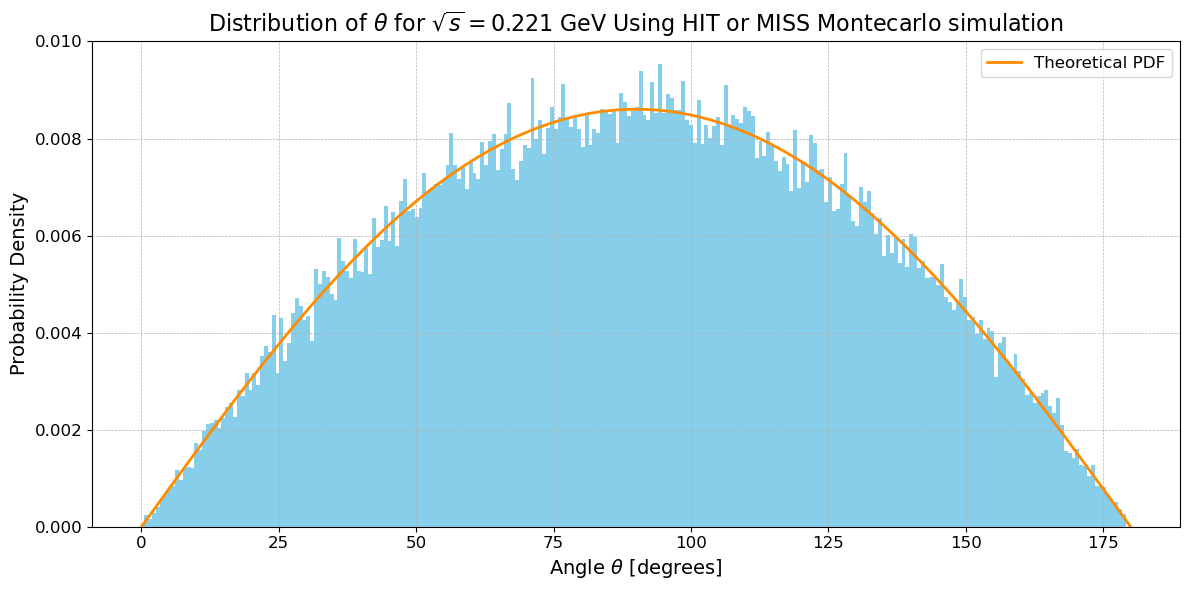

In [24]:
#Plot
num_bins_hm = int(np.sqrt(len(theta_samples_hm)))

plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(theta_samples_hm, bins=num_bins_hm, density=True, color='skyblue')
plt.plot(theta_values_deg, pdf_norm(E_sim**2,theta_values_deg), color='darkorange', linewidth=2, label="Theoretical PDF")
plt.title(r'Distribution of $\theta$ for $\sqrt{s}=$' + str(round(E_sim, 3)) + ' GeV Using HIT or MISS Montecarlo simulation', fontsize=16)
plt.xlabel(r'Angle $\theta$ [degrees]', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

### > METROPOLIS

In [25]:
def metropolis_hastings(distribution, initial_sample, interations, passes, s=E_sim**2):
    current_sample = initial_sample
    samples = [current_sample]
    accepted = 0
    for i in range(iterations):
        new_sample = np.random.normal(current_sample, passes) #proposal distribution
        acceptance_ratio = distribution(s,new_sample) / distribution(s,current_sample)
        if (np.random.uniform(0,1,1) <= acceptance_ratio):
            current_sample = new_sample
            accepted += 1
        samples.append(current_sample)
    return np.asarray(samples),accepted

initial_sample = 90
passes = 7.5

In [26]:
#Data saving and performance of the method
mem_before_mh = process.memory_info().rss / 1024 / 1024
start_time_mh = time.time()
theta_samples_mh, accepted = metropolis_hastings(pdf_norm, initial_sample, iterations, passes)
end_time_mh = time.time()
mem_after_mh = process.memory_info().rss / 1024 / 1024
    
#filename_mh = f"data/theta_samples_MH.csv"
#np.savetxt(filename_mh, theta_samples_mh)

time_mh = round((end_time_mh - start_time_mh),3)
mem_usage_mh = round((mem_after_mh - mem_before_mh),3)
accepted_mh = round((len(theta_samples_mh)/iterations),3)

print(f"Execution time: {time_mh} seconds")
print(f"Memory usage: {mem_usage_mh} MB")
print(f"Accepted rate: {accepted_mh}")

Execution time: 4.297 seconds
Memory usage: 2.812 MB
Accepted rate: 1.0


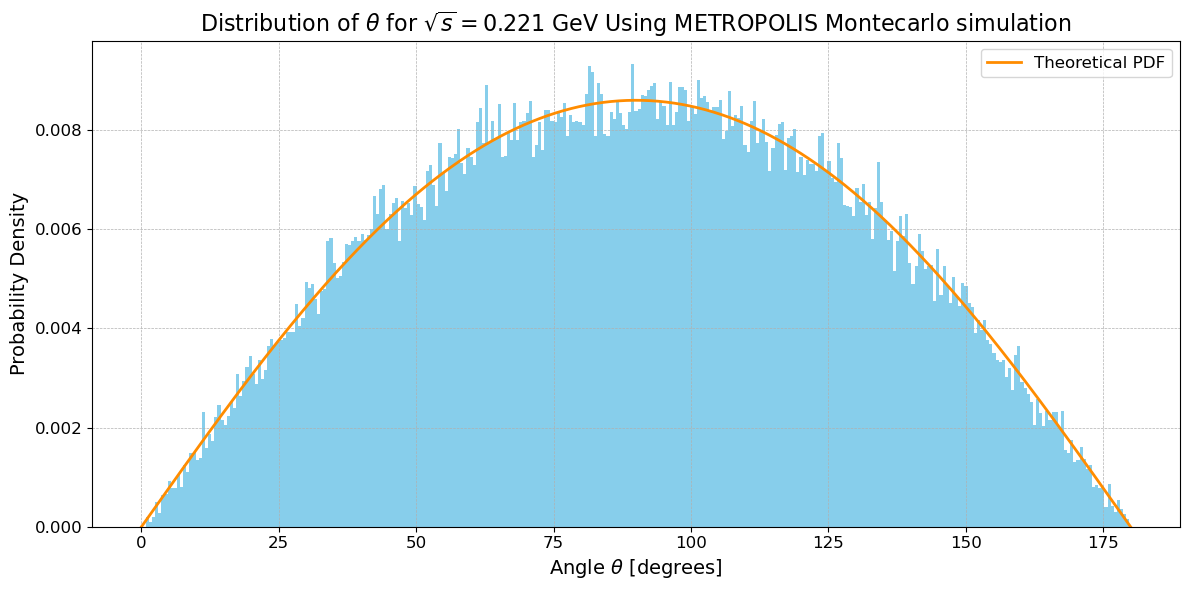

In [30]:
#Plot
num_bins_mh = int(np.sqrt(len(theta_samples_mh)))

plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(theta_samples_mh, bins=num_bins_mh, density=True, color='skyblue')
plt.plot(theta_values_deg, pdf_norm(E_sim**2,theta_values_deg), color='darkorange', linewidth=2, label="Theoretical PDF")
plt.title(r'Distribution of $\theta$ for $\sqrt{s}=$' + str(round(E_sim, 3)) + ' GeV Using METROPOLIS Montecarlo simulation', fontsize=16)
plt.xlabel(r'Angle $\theta$ [degrees]', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

### > INVERSE SAMPLING

In [36]:
#Func
def pdf_cos(z, s=E_sim**2):#- comes from sin(theta)d(theta) = -d(cos(theta))= -dz
    return(((fsc**2)*np.pi*2/(4*s))*np.sqrt(1-(4*m_mu**2/s))*((1+(4*m_mu**2/s))+(1-(4*m_mu**2/s))*z**2))*conv

cost_norm_cos =integrate.quad(lambda z: pdf_cos(z),-1,1)

def pdf_cos_norm(z,s=E_sim**2):
    return pdf_cos(z,s)/cost_norm_z[0]

def cdf_zeros(y,x,s):
    cost = ((fsc**2)*np.pi*2/(4*s))*np.sqrt(1-(4*m_mu**2/s))*conv
    norm_cost = cross_section(s)
    return(- cost/(norm_cost))*( 1/3*(1-(4*m_mu**2/s))*y**3 + \
                                (1+(4*m_mu**2/s))*y - 4/3*(1 + 2*m_mu**2/s) ) - x

In [37]:
#Data saving and performance of the method
mem_before_is = process.memory_info().rss / 1024 / 1024
start_time_is = time.time()
r_samples = np.random.uniform(0,1,iterations)
theta_samples_is = [brentq((cdf_zeros),-1,1,args=(r,s)) for r,s in zip(r_samples,[E_sim**2]*iterations)]
end_time_is = time.time()
mem_after_is = process.memory_info().rss / 1024 / 1024
    
#filename_is = f"data/theta_samples_IS.csv"
#np.savetxt(filename_is, theta_samples_is)

time_is = round((end_time_is - start_time_is),3)
mem_usage_is = round((mem_after_mh - mem_before_mh),3)
accepted_is = round((len(theta_samples_mh)/iterations),3)

print(f"Execution time: {time_is} seconds")
print(f"Memory usage: {mem_usage_is} MB")
print(f"Accepted rate: {accepted_is}")

Execution time: 8.846 seconds
Memory usage: 2.812 MB
Accepted rate: 1.0


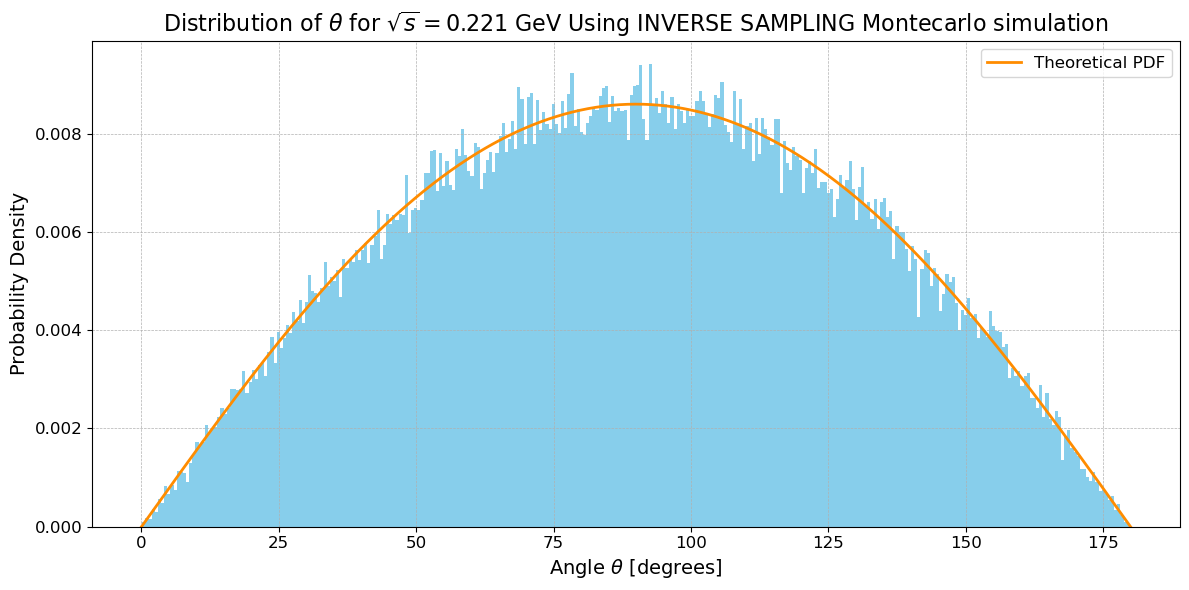

In [39]:
#Plot
theta_sample_is_converted = 180*np.arccos(theta_samples_is)/np.pi
num_bins_is = int(np.sqrt(len(theta_samples_is)))

plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(theta_sample_is_converted, bins=num_bins_is, density=True, color='skyblue')
plt.plot(theta_values_deg, pdf_norm(E_sim**2,theta_values_deg), color='darkorange', linewidth=2, label="Theoretical PDF")
plt.title(r'Distribution of $\theta$ for $\sqrt{s}=$' + str(round(E_sim, 3)) + ' GeV Using INVERSE SAMPLING Montecarlo simulation', fontsize=16)
plt.xlabel(r'Angle $\theta$ [degrees]', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

In [40]:
# Comparison
methods = ["Hit or Miss", "Metropolis - Hastings", "Inverse sampling"]
times = [time_hm, time_mh, time_is]
mem_usages = [mem_usage_hm, mem_usage_mh, mem_usage_is]
acceptances = [accepted_hm, accepted_mh, accepted_is]

for method, time, mem_usage, acceptance in zip(methods, times, mem_usages, acceptances):
    print(f"{method}: Time = {time}, Memory usage = {mem_usage}, Acceptance = {acceptance}")

Hit or Miss: Time = 0.02, Memory usage = 1.535, Acceptance = 0.646
Metropolis - Hastings: Time = 4.297, Memory usage = 2.812, Acceptance = 1.0
Inverse sampling: Time = 8.846, Memory usage = 2.812, Acceptance = 1.0


[BabaYaga](https://www2.pv.infn.it/~hepcomplex/babayaga.html) is a Monte Carlo event generator for $e^+e^- --> e^+e^-, μ^+μ^-, γγ$ and $π^+π^-$ processes at flavour factories, i.e. for energies below 10-12 GeV, it has been developed at the INFN center of Pavia by  C.M. Carloni Calame, G. Montagna, O. Nicrosini, F. Piccinini.

In [41]:
Babayaga = np.loadtxt("matched_el_th_exp_200.txt").T
j = 1.05 #da capire che fattore mettere (voglio scegliere il migliore possibile)

plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(theta_sample_is_converted, bins=num_bins_is, density=True, color='skyblue')
k=(np.max(Babayaga[1]))*j/np.max(counts)
Baba_plotted = Babayaga[1]/k
centers = [Babayaga[0][i]+(Babayaga[0][i+1]-Babayaga[0][i])/2 for i in np.arange(0,len(Babayaga[0])-1)]
centers.append(Babayaga[0][-1]+(Babayaga[0][-1]-Babayaga[0][-2]))
plt.plot(centers,Baba_plotted, color='darkorange', linewidth=2, label="Theoretical PDF")
plt.title(r'Distribution of $\theta$ for $\sqrt{s}=$' + str(round(E_sim, 3)) + ' GeV Using Babayaga distribution with Inverse Sampling samples', fontsize=16)
plt.xlabel(r'Angle $\theta$ [degrees]', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

FileNotFoundError: matched_el_th_exp_200.txt not found.

In [42]:
%precision 6
theta = theta_sample_is_converted
N_samples = len(theta)
phi = 360*np.random.random(N_samples)
p_1 = np.sqrt(E_sim**2/4 - m_mu**2)
momenta=pd.DataFrame(columns=['Anti_muon_px','Anti_muon_py','Anti_muon_pz','Muon_px','Muon_py','Muon_pz'])

sin_theta_c = np.sin(theta*(np.pi/180))
cos_theta_c = np.cos(theta*(np.pi/180))
sin_phi_c = np.sin(phi*(np.pi/180))
cos_phi_c = np.cos(phi*(np.pi/180))

momenta['Anti_muon_px'] = p_1*cos_phi_c*sin_theta_c
momenta['Anti_muon_py'] = p_1*sin_phi_c*sin_theta_c
momenta['Anti_muon_pz'] = p_1*cos_theta_c
momenta['Muon_px'] = - momenta['Anti_muon_px']
momenta['Muon_py'] = - momenta['Anti_muon_py']
momenta['Muon_pz'] = - momenta['Anti_muon_pz']

momenta.to_csv("data/Momenta_CoM.csv", index=False, index_label=False)
momenta = pd.read_csv("data/Momenta_CoM.csv")

fig, ax = plt.subplots(1, 3, figsize=(28, 8))
titles = [r'$\mu^-$ $p_x$ (CoM frame)', r'$\mu^-$ $p_y$ (CoM frame)', r'$\mu^-$ $p_z$ (CoM frame)']
colors = ['skyblue', 'salmon', 'lightgreen']

for i, coord in enumerate(['Muon_px', 'Muon_py', 'Muon_pz']):
    ax[i].hist(momenta[coord], bins=20, color=colors[i], edgecolor='black')
    ax[i].set_title(titles[i], fontsize=20, fontweight='bold')
    ax[i].set_ylabel(r"Counts [#]", fontsize=20, fontweight='bold')
    ax[i].set_xlabel(f'{coord[-2:]} [GeV]', fontsize=20, fontweight='bold')
    ax[i].tick_params(labelsize=16, length=6, width=2)
    ax[i].ticklabel_format(style='sci', axis='y', scilimits=(-3, 3))
    ax[i].yaxis.get_offset_text().set_fontsize(16)
    ax[i].grid(visible=True, which='major', color='grey', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()
print(momenta.head())

OSError: Cannot save file into a non-existent directory: 'data'

## 3.
boost muons four-momenta in the laboratory frame, i.e. in the frame where the electron is at rest and the positron has enough energy to give rise to the process

## CoM-to-Lab frame

The four-momentum transforms as any four-vector under Lorenz transformation. We can simply make a Lorentz boost:

\begin{align}
    E' &= \gamma(E - \beta p_z) \\
    p'_x &= p_x \\
    p'_y &= p_y \\
    p'_z &= \gamma(p_z - \beta E)
\end{align}

where $\beta = -\frac{v}{c}$ and $\gamma = (1 - \beta^2)^{-1/2}$. 

We can now calculate the velocity of the incoming positron (from now on $c = 1$):

\begin{equation*}
    \beta = -v_z = -\frac{p_z}{E} 
         = -\frac{\sqrt{E^2 - p_z^2}}{E} 
         = -\sqrt{1 - \frac{p_z^2}{E^2}} 
         = -\sqrt{1 - \frac{4p_z^2}{s}} \simeq -\sqrt{1 - \frac{m_e^2}{m_\mu^2}}
\end{equation*}

In [289]:
momentum = np.sqrt((E_exp / 2) ** 2 - (electron_mass**2)) #positron momentum using the relativistic formula
gamma = E_exp / (2 * electron_mass) # Lorentz gamma factor

# Computes Lorentz-transformed variables
def lorentz_boost(E, px, py, pz, gamma):

    v = np.sqrt(1 - 1 / gamma ** 2 ) # Calculate velocity
    pz_t = gamma * (pz - E * v) #Transformed momentum along z-axis
    E_t = gamma * (E - pz * v) #Transformed energy
    
   
    return E_t, px, py, pz_t, v
v=lorentz_boost(E_exp, 0,0, momentum, gamma)[4] #Compute the velocity using Lorentz transformation

#In the Lorentz transformation, only the momentum component along the z-axis (pz) is altered,
#while the components along the x-axis (px) and y-axis (py) remain unchanged.
print("Velocity (v):", v)
print("Lorentz gamma factor:", gamma)



Velocity (v): 0.9999888392820437
Lorentz gamma factor: 211.66066065199658


## 6. 
 assume a $3$ cm thick Beryllium block is used as target and a rate of positron on target of $10^6$ Hz. Compute the rescaling factor (weight) you need to apply to the $N$ simulated events such that they represent the statistics that would be gathered in a week of countinuous operations

![pic](block.jpeg) 


Given $N$ generated events, we can calculate the correct statistics for this experiment lasting one week just by applying to the simulated events a rescaling factor. The target is a 3cm thick Beryllium block and it is bombarded by a positrons arriving at a rate of $10^6$ Hz.

The number of $(\mu^+ \mu^-)$ pairs produced per positron bunch on target is:

$$N(\mu^+\mu^-) = \sigma(e^+e^- \longrightarrow \mu^+\mu^-)N(e^+)\rho(e^-)D,$$
where
$N(e^+) $ is number	of	positrons,
  $N_{Be}(e^-) $ is number	of	electrons per atom of Beryllium
 $\rho(e^-) $ is target	electron	density and
$D$ is the thickness of the Beryllium block.

$$\rho(e^-) = \frac{\rho_{Be}{N_A}}{M_{Be}},$$
where
$N_A  $ is Avogadro's number
$M_{Be}  $ is molar mass of Beryllium and
 $\rho_{Be}  $ is density of Beryllium

$$N(e^+) = \omega_{e^+}T,$$
where
$\omega_{e^+}$  is rate of positron and
  T is time of the experiment





In [290]:
N_sim = 10**5 
N_A = 6.02214076e23 # [1/mol] avogadro constant
dens= 1.848 # [g/cm^3] density of Beryllium
m = 9.012182 # [g/mol] molar mass Beryllium
l = 6 # [cm] thickness of Beryllium block
e=4 #number of electron of Beryllium
rate = 1e6 # [1/s] rate of positron
t=604800 # time of the experiment (seconds in a week)

N_p=rate*t #number of positrons
N= total_cross_section_nb(s=E_exp**2)*1e-33*rate*t*e*(dens*N_A/m*l) # number of created muons

rescaling_factor = N_p/N_sim

print(" Number of positrons : ","{:.2E}".format(N_p))
print(r' Number of created muons in one week operation at E = ',"{:.3f}".format(E_exp),"GeV"," : ","{:.2E}".format(N))
print(" Rescaling factor: ","{:.2E}".format(rescaling_factor))





 Number of positrons :  6.05E+11
 Number of created muons in one week operation at E =  0.216 GeV  :  1.05E+06
 Rescaling factor:  6.05E+06


extra references : [(LEMMA)M.Antonelli](https://agenda.infn.it/event/15095/contributions/28458/attachments/20277/22980/04_LEMMA_formazione.pdf#page=13)
